# Introductory overview

https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html

## Linear Regression

### Generating Data

In [1]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [3]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma

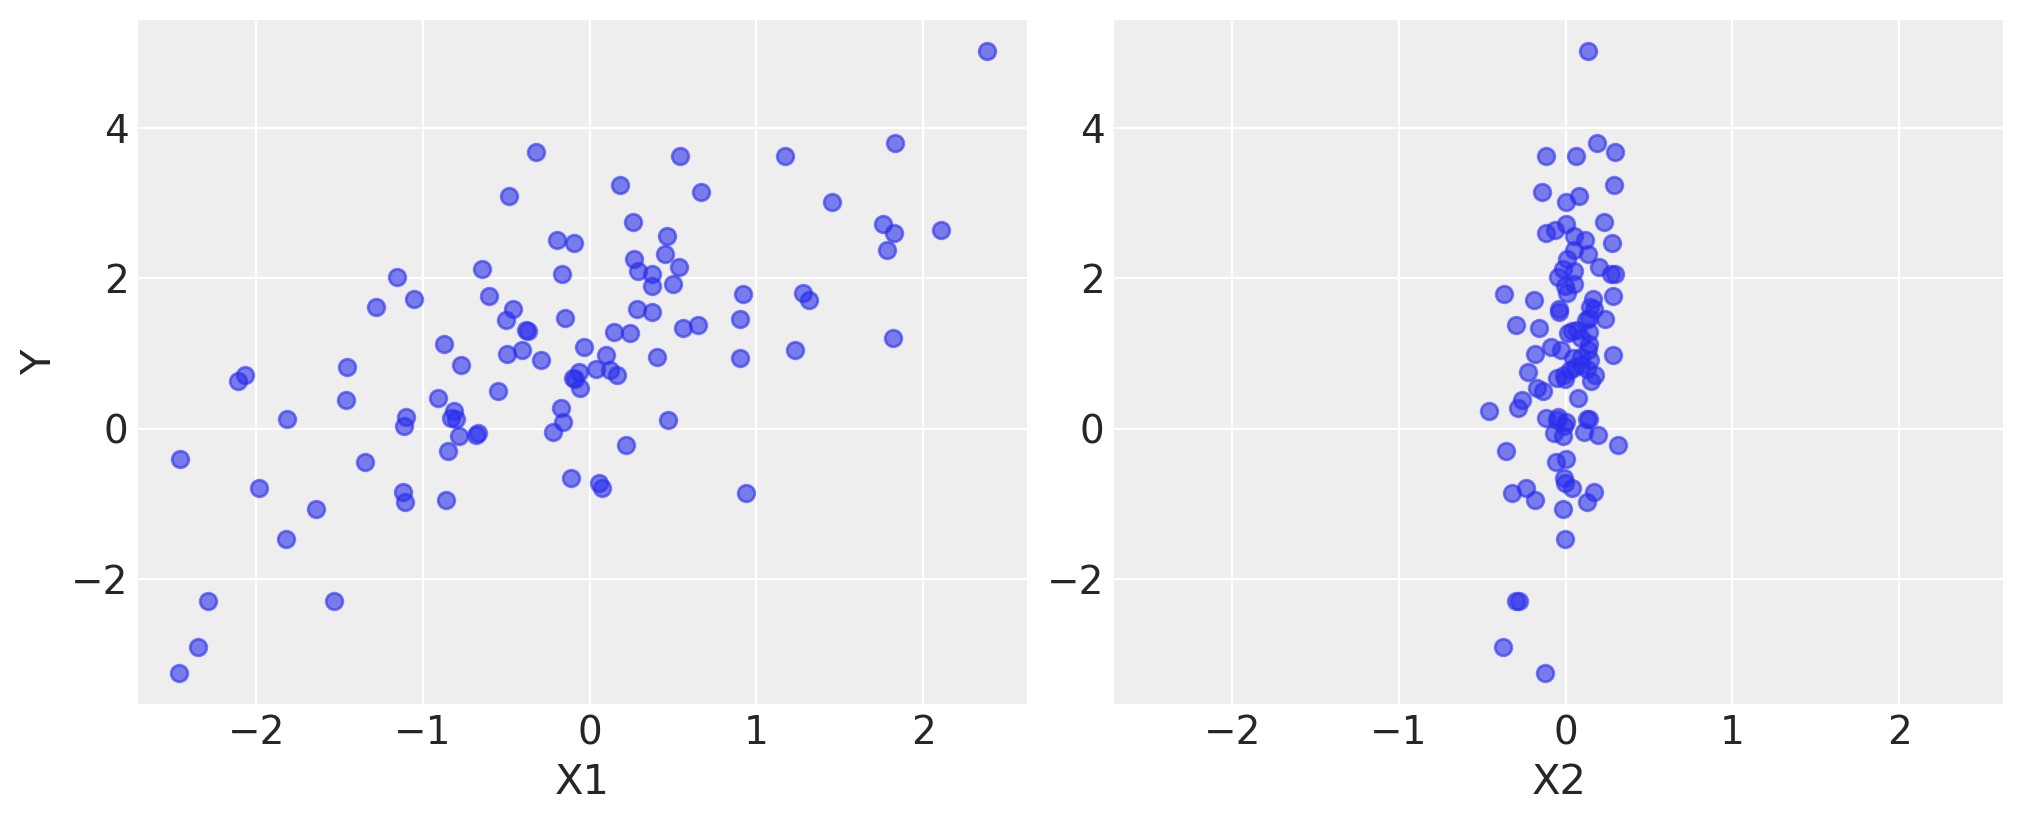

In [4]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");

### Model Specification

In [5]:
import pymc as pm

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.6.1


In [6]:
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta  = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

In [13]:
with basic_model:
    # draw 1000 posterior samples
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 51 seconds.


The sample function runs the `step` method(s) assigned (or passed) to it for the given number of iterations and returns an **`InferenceData object`** containing the samples collected, along with other useful attributes like statistics of the sampling run and a copy of the observed data. Notice that `sample` generated a set of parallel chains, depending on how many compute cores are on your machine.

In [8]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

The various attributes of the `InferenceData` object can be queried in a similar way to a `dict` containing a map from variable names to `numpy.arrays`. For example, we can retrieve the sampling trace from the `alpha` latent variable by using the variable name as an index to the `idata.posterior` attribute. The first dimension of the returned array is the chain index, the second dimension is the sampling index, while the later dimensions match the shape of the variable. We can see the first 5 values for the `alpha` variable in each chain as follows:

In [60]:
idata.posterior["alpha"].sel(draw=slice(0, 4))

<xarray.DataArray 'alpha' (chain: 4, draw: 5)>
array([[1.12276274, 1.11005238, 0.99623851, 1.24938674, 1.0506385 ],
       [1.25724022, 1.03229677, 1.10573199, 1.07587254, 1.06191374],
       [0.94800001, 0.95102254, 1.2598746 , 0.98814999, 1.02122994],
       [1.02491853, 1.26488124, 1.00425143, 1.30357733, 0.97609226]])
Coordinates:
  * chain    (chain) int32 0 1 2 3
  * draw     (draw) int32 0 1 2 3 4
Attributes:
    long_name:  Intercept
    units:      NA

#### XARRAYs

In [24]:
type(idata.posterior['alpha'])

xarray.core.dataarray.DataArray

In [29]:
idata.posterior['alpha'].dims

('chain', 'draw')

In [30]:
idata.posterior['alpha'].coords

Coordinates:
  * chain    (chain) int32 0 1 2 3
  * draw     (draw) int32 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999

In [32]:
idata.posterior['alpha'].attrs

{}

##### Indexing

In [34]:
# positional and by integer label, like numpy
# First chain, all draws
idata.posterior['alpha'][0, :]

<xarray.DataArray 'alpha' (draw: 1000)>
array([1.12276274, 1.11005238, 0.99623851, 1.24938674, 1.0506385 ,
       1.03408334, 1.03408334, 0.97381899, 1.13885433, 1.1616176 ,
       1.19366371, 1.02198831, 1.10222643, 1.28887957, 0.92553596,
       1.13198131, 1.10660411, 1.24068767, 1.21969176, 1.1199316 ,
       0.96982178, 1.03655279, 1.26418164, 1.29972928, 1.27952006,
       1.2234843 , 1.08662818, 1.19663255, 1.16117961, 1.21608716,
       1.17370838, 1.0699381 , 1.1804252 , 1.15189091, 1.03685267,
       1.25216719, 1.18331449, 1.2196021 , 1.13675156, 1.04642423,
       1.14589487, 1.12594716, 1.21849089, 1.2116289 , 1.1684355 ,
       1.35256939, 1.30374042, 1.01615516, 1.15722211, 1.29465786,
       1.05009728, 1.17360784, 1.05114673, 1.2404139 , 1.25350296,
       1.08675569, 1.18974692, 1.3318234 , 0.93109418, 1.07260661,
       1.03821493, 1.0518402 , 1.32504949, 1.15315747, 1.16666526,
       1.14384826, 1.14581063, 1.07140555, 1.1871731 , 1.14942673,
       0.9603976 , 1.21142355, 1.12887551, 1.02760241, 1.3390765 ,
       1.381854  , 1.20047927, 1.1788545 , 1.11601827, 1.11601827,
       1.18884148, 1.04636364, 1.34884792, 1.02710665, 1.02710665,
       1.18837336, 1.04801915, 1.19569502, 1.11611699, 1.11877991,
       1.16024707, 1.07022298, 1.04844962, 1.26986314, 1.0025885 ,
       1.09671967, 1.07337539, 1.36421109, 1.12896915, 1.08516032,
...
       1.21521867, 1.08474657, 1.16885293, 1.17827905, 1.02707367,
       1.13359884, 1.22620791, 1.26796003, 1.05370067, 1.2305274 ,
       1.0052902 , 1.12746442, 1.08358591, 1.21231921, 1.19866374,
       1.19917993, 1.03197913, 1.07755619, 1.08731969, 1.22206453,
       1.06938305, 1.11324965, 1.13794311, 1.17643539, 1.07364443,
       1.22156545, 1.39087262, 1.12598972, 1.26625441, 1.07224571,
       1.2479886 , 0.94437041, 1.17761354, 1.23087641, 0.95437868,
       1.22068182, 1.13116666, 1.31710666, 0.91491296, 0.98335666,
       0.85677068, 1.15121328, 1.00438786, 0.94850755, 1.36669347,
       1.56556271, 1.16671188, 0.99032159, 0.99032159, 1.10180361,
       0.96896963, 0.97260789, 1.08590298, 1.12990458, 1.17463678,
       1.05755465, 1.21184977, 1.01153198, 1.24303574, 1.20603906,
       1.05402661, 1.12680361, 1.17630519, 1.24692236, 1.23453612,
       0.81099598, 1.19658864, 1.00357294, 1.25443505, 1.1517843 ,
       1.18073594, 1.113648  , 0.95343459, 1.2536955 , 0.80719065,
       0.90366441, 1.38097479, 1.17888129, 1.09463772, 1.15783561,
       1.10701445, 1.10035222, 1.05603864, 1.24543872, 1.06002236,
       1.19478403, 1.05340308, 1.09401569, 1.17541809, 1.15699251,
       1.11369518, 1.32653234, 1.12799174, 0.83932047, 0.99036678,
       1.23671063, 1.10739761, 1.16306588, 1.17887537, 1.21619618])
Coordinates:
    chain    int32 0
  * draw     (draw) int32 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999

In [38]:
# loc or "location": positional and coordinate label, like pandas
idata.posterior['alpha'].loc[0, :]

<xarray.DataArray 'alpha' (draw: 1000)>
array([1.12276274, 1.11005238, 0.99623851, 1.24938674, 1.0506385 ,
       1.03408334, 1.03408334, 0.97381899, 1.13885433, 1.1616176 ,
       1.19366371, 1.02198831, 1.10222643, 1.28887957, 0.92553596,
       1.13198131, 1.10660411, 1.24068767, 1.21969176, 1.1199316 ,
       0.96982178, 1.03655279, 1.26418164, 1.29972928, 1.27952006,
       1.2234843 , 1.08662818, 1.19663255, 1.16117961, 1.21608716,
       1.17370838, 1.0699381 , 1.1804252 , 1.15189091, 1.03685267,
       1.25216719, 1.18331449, 1.2196021 , 1.13675156, 1.04642423,
       1.14589487, 1.12594716, 1.21849089, 1.2116289 , 1.1684355 ,
       1.35256939, 1.30374042, 1.01615516, 1.15722211, 1.29465786,
       1.05009728, 1.17360784, 1.05114673, 1.2404139 , 1.25350296,
       1.08675569, 1.18974692, 1.3318234 , 0.93109418, 1.07260661,
       1.03821493, 1.0518402 , 1.32504949, 1.15315747, 1.16666526,
       1.14384826, 1.14581063, 1.07140555, 1.1871731 , 1.14942673,
       0.9603976 , 1.21142355, 1.12887551, 1.02760241, 1.3390765 ,
       1.381854  , 1.20047927, 1.1788545 , 1.11601827, 1.11601827,
       1.18884148, 1.04636364, 1.34884792, 1.02710665, 1.02710665,
       1.18837336, 1.04801915, 1.19569502, 1.11611699, 1.11877991,
       1.16024707, 1.07022298, 1.04844962, 1.26986314, 1.0025885 ,
       1.09671967, 1.07337539, 1.36421109, 1.12896915, 1.08516032,
...
       1.21521867, 1.08474657, 1.16885293, 1.17827905, 1.02707367,
       1.13359884, 1.22620791, 1.26796003, 1.05370067, 1.2305274 ,
       1.0052902 , 1.12746442, 1.08358591, 1.21231921, 1.19866374,
       1.19917993, 1.03197913, 1.07755619, 1.08731969, 1.22206453,
       1.06938305, 1.11324965, 1.13794311, 1.17643539, 1.07364443,
       1.22156545, 1.39087262, 1.12598972, 1.26625441, 1.07224571,
       1.2479886 , 0.94437041, 1.17761354, 1.23087641, 0.95437868,
       1.22068182, 1.13116666, 1.31710666, 0.91491296, 0.98335666,
       0.85677068, 1.15121328, 1.00438786, 0.94850755, 1.36669347,
       1.56556271, 1.16671188, 0.99032159, 0.99032159, 1.10180361,
       0.96896963, 0.97260789, 1.08590298, 1.12990458, 1.17463678,
       1.05755465, 1.21184977, 1.01153198, 1.24303574, 1.20603906,
       1.05402661, 1.12680361, 1.17630519, 1.24692236, 1.23453612,
       0.81099598, 1.19658864, 1.00357294, 1.25443505, 1.1517843 ,
       1.18073594, 1.113648  , 0.95343459, 1.2536955 , 0.80719065,
       0.90366441, 1.38097479, 1.17888129, 1.09463772, 1.15783561,
       1.10701445, 1.10035222, 1.05603864, 1.24543872, 1.06002236,
       1.19478403, 1.05340308, 1.09401569, 1.17541809, 1.15699251,
       1.11369518, 1.32653234, 1.12799174, 0.83932047, 0.99036678,
       1.23671063, 1.10739761, 1.16306588, 1.17887537, 1.21619618])
Coordinates:
    chain    int32 0
  * draw     (draw) int32 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999

In [40]:
# isel or "integer select":  by dimension name and integer label
idata.posterior['alpha'].isel(chain=0)

<xarray.DataArray 'alpha' (draw: 1000)>
array([1.12276274, 1.11005238, 0.99623851, 1.24938674, 1.0506385 ,
       1.03408334, 1.03408334, 0.97381899, 1.13885433, 1.1616176 ,
       1.19366371, 1.02198831, 1.10222643, 1.28887957, 0.92553596,
       1.13198131, 1.10660411, 1.24068767, 1.21969176, 1.1199316 ,
       0.96982178, 1.03655279, 1.26418164, 1.29972928, 1.27952006,
       1.2234843 , 1.08662818, 1.19663255, 1.16117961, 1.21608716,
       1.17370838, 1.0699381 , 1.1804252 , 1.15189091, 1.03685267,
       1.25216719, 1.18331449, 1.2196021 , 1.13675156, 1.04642423,
       1.14589487, 1.12594716, 1.21849089, 1.2116289 , 1.1684355 ,
       1.35256939, 1.30374042, 1.01615516, 1.15722211, 1.29465786,
       1.05009728, 1.17360784, 1.05114673, 1.2404139 , 1.25350296,
       1.08675569, 1.18974692, 1.3318234 , 0.93109418, 1.07260661,
       1.03821493, 1.0518402 , 1.32504949, 1.15315747, 1.16666526,
       1.14384826, 1.14581063, 1.07140555, 1.1871731 , 1.14942673,
       0.9603976 , 1.21142355, 1.12887551, 1.02760241, 1.3390765 ,
       1.381854  , 1.20047927, 1.1788545 , 1.11601827, 1.11601827,
       1.18884148, 1.04636364, 1.34884792, 1.02710665, 1.02710665,
       1.18837336, 1.04801915, 1.19569502, 1.11611699, 1.11877991,
       1.16024707, 1.07022298, 1.04844962, 1.26986314, 1.0025885 ,
       1.09671967, 1.07337539, 1.36421109, 1.12896915, 1.08516032,
...
       1.21521867, 1.08474657, 1.16885293, 1.17827905, 1.02707367,
       1.13359884, 1.22620791, 1.26796003, 1.05370067, 1.2305274 ,
       1.0052902 , 1.12746442, 1.08358591, 1.21231921, 1.19866374,
       1.19917993, 1.03197913, 1.07755619, 1.08731969, 1.22206453,
       1.06938305, 1.11324965, 1.13794311, 1.17643539, 1.07364443,
       1.22156545, 1.39087262, 1.12598972, 1.26625441, 1.07224571,
       1.2479886 , 0.94437041, 1.17761354, 1.23087641, 0.95437868,
       1.22068182, 1.13116666, 1.31710666, 0.91491296, 0.98335666,
       0.85677068, 1.15121328, 1.00438786, 0.94850755, 1.36669347,
       1.56556271, 1.16671188, 0.99032159, 0.99032159, 1.10180361,
       0.96896963, 0.97260789, 1.08590298, 1.12990458, 1.17463678,
       1.05755465, 1.21184977, 1.01153198, 1.24303574, 1.20603906,
       1.05402661, 1.12680361, 1.17630519, 1.24692236, 1.23453612,
       0.81099598, 1.19658864, 1.00357294, 1.25443505, 1.1517843 ,
       1.18073594, 1.113648  , 0.95343459, 1.2536955 , 0.80719065,
       0.90366441, 1.38097479, 1.17888129, 1.09463772, 1.15783561,
       1.10701445, 1.10035222, 1.05603864, 1.24543872, 1.06002236,
       1.19478403, 1.05340308, 1.09401569, 1.17541809, 1.15699251,
       1.11369518, 1.32653234, 1.12799174, 0.83932047, 0.99036678,
       1.23671063, 1.10739761, 1.16306588, 1.17887537, 1.21619618])
Coordinates:
    chain    int32 0
  * draw     (draw) int32 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999

In [46]:
# sel or "select": by dimension name and coordinate label
idata.posterior['alpha'].sel(chain=0)

<xarray.DataArray 'alpha' (draw: 1000)>
array([1.12276274, 1.11005238, 0.99623851, 1.24938674, 1.0506385 ,
       1.03408334, 1.03408334, 0.97381899, 1.13885433, 1.1616176 ,
       1.19366371, 1.02198831, 1.10222643, 1.28887957, 0.92553596,
       1.13198131, 1.10660411, 1.24068767, 1.21969176, 1.1199316 ,
       0.96982178, 1.03655279, 1.26418164, 1.29972928, 1.27952006,
       1.2234843 , 1.08662818, 1.19663255, 1.16117961, 1.21608716,
       1.17370838, 1.0699381 , 1.1804252 , 1.15189091, 1.03685267,
       1.25216719, 1.18331449, 1.2196021 , 1.13675156, 1.04642423,
       1.14589487, 1.12594716, 1.21849089, 1.2116289 , 1.1684355 ,
       1.35256939, 1.30374042, 1.01615516, 1.15722211, 1.29465786,
       1.05009728, 1.17360784, 1.05114673, 1.2404139 , 1.25350296,
       1.08675569, 1.18974692, 1.3318234 , 0.93109418, 1.07260661,
       1.03821493, 1.0518402 , 1.32504949, 1.15315747, 1.16666526,
       1.14384826, 1.14581063, 1.07140555, 1.1871731 , 1.14942673,
       0.9603976 , 1.21142355, 1.12887551, 1.02760241, 1.3390765 ,
       1.381854  , 1.20047927, 1.1788545 , 1.11601827, 1.11601827,
       1.18884148, 1.04636364, 1.34884792, 1.02710665, 1.02710665,
       1.18837336, 1.04801915, 1.19569502, 1.11611699, 1.11877991,
       1.16024707, 1.07022298, 1.04844962, 1.26986314, 1.0025885 ,
       1.09671967, 1.07337539, 1.36421109, 1.12896915, 1.08516032,
...
       1.21521867, 1.08474657, 1.16885293, 1.17827905, 1.02707367,
       1.13359884, 1.22620791, 1.26796003, 1.05370067, 1.2305274 ,
       1.0052902 , 1.12746442, 1.08358591, 1.21231921, 1.19866374,
       1.19917993, 1.03197913, 1.07755619, 1.08731969, 1.22206453,
       1.06938305, 1.11324965, 1.13794311, 1.17643539, 1.07364443,
       1.22156545, 1.39087262, 1.12598972, 1.26625441, 1.07224571,
       1.2479886 , 0.94437041, 1.17761354, 1.23087641, 0.95437868,
       1.22068182, 1.13116666, 1.31710666, 0.91491296, 0.98335666,
       0.85677068, 1.15121328, 1.00438786, 0.94850755, 1.36669347,
       1.56556271, 1.16671188, 0.99032159, 0.99032159, 1.10180361,
       0.96896963, 0.97260789, 1.08590298, 1.12990458, 1.17463678,
       1.05755465, 1.21184977, 1.01153198, 1.24303574, 1.20603906,
       1.05402661, 1.12680361, 1.17630519, 1.24692236, 1.23453612,
       0.81099598, 1.19658864, 1.00357294, 1.25443505, 1.1517843 ,
       1.18073594, 1.113648  , 0.95343459, 1.2536955 , 0.80719065,
       0.90366441, 1.38097479, 1.17888129, 1.09463772, 1.15783561,
       1.10701445, 1.10035222, 1.05603864, 1.24543872, 1.06002236,
       1.19478403, 1.05340308, 1.09401569, 1.17541809, 1.15699251,
       1.11369518, 1.32653234, 1.12799174, 0.83932047, 0.99036678,
       1.23671063, 1.10739761, 1.16306588, 1.17887537, 1.21619618])
Coordinates:
    chain    int32 0
  * draw     (draw) int32 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999

##### Attributes

In [47]:
idata.posterior['alpha'].attrs["long_name"] = "Intercept"

idata.posterior['alpha'].attrs["units"] = "NA"

##### Computation

In [50]:
idata.posterior['alpha'].mean(dim="draw")

<xarray.DataArray 'alpha' (chain: 4)>
array([1.13287943, 1.13059747, 1.13954945, 1.13644656])
Coordinates:
  * chain    (chain) int32 0 1 2 3

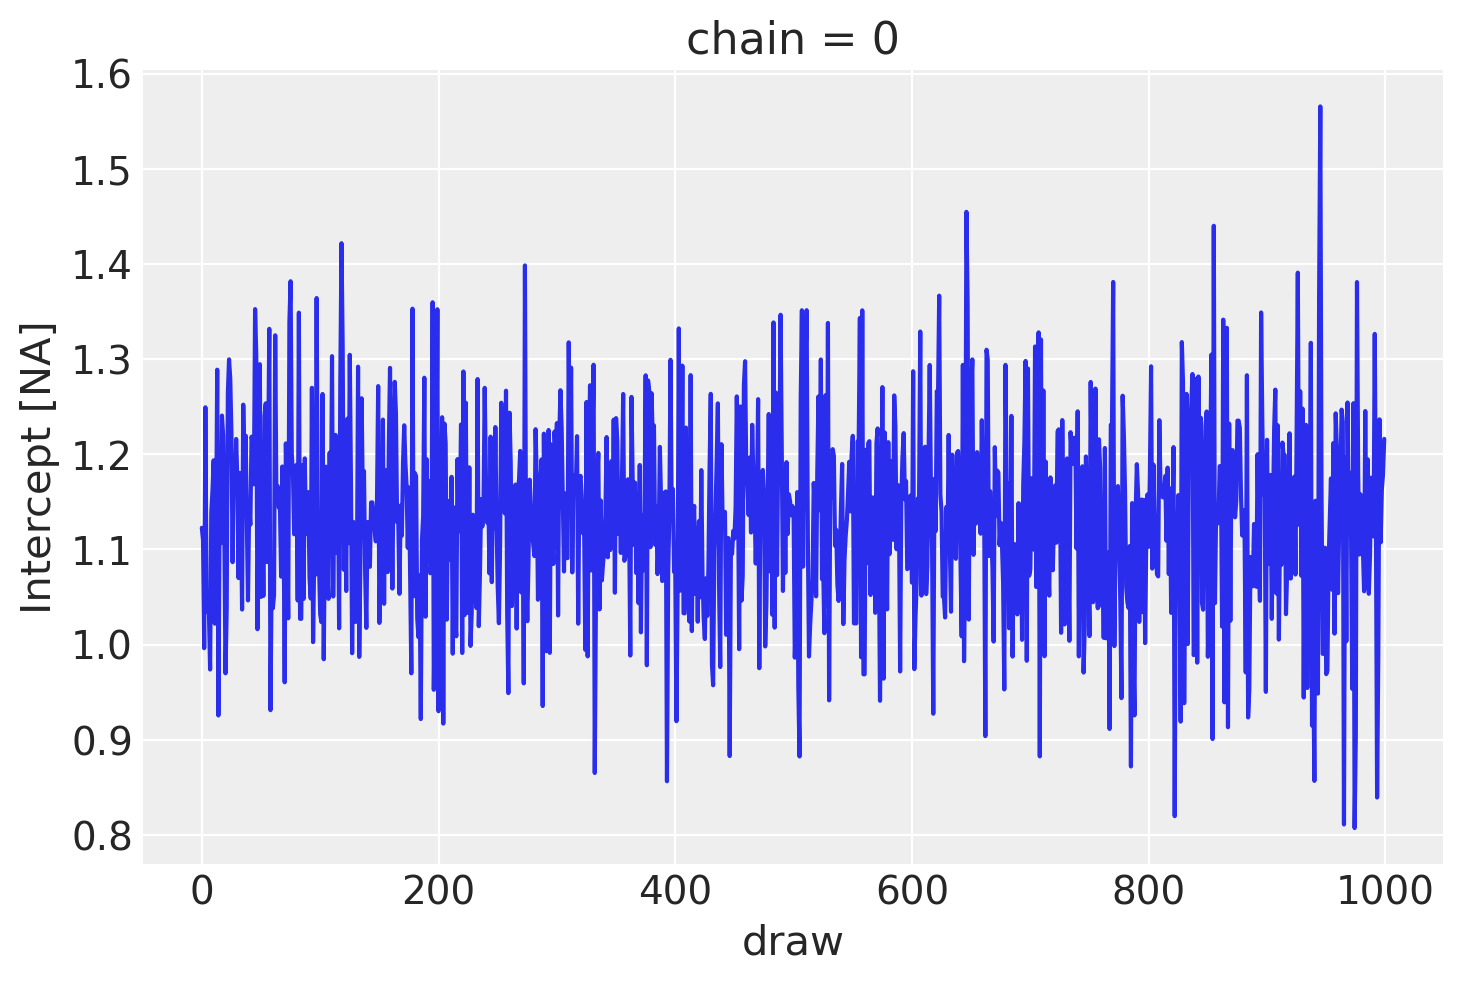

In [55]:
idata.posterior['alpha'].sel(chain=0).plot()

In [56]:
idata.posterior['alpha'].to_series()

chain  draw
0      0       1.122763
       1       1.110052
       2       0.996239
       3       1.249387
       4       1.050639
                 ...   
3      995     1.150819
       996     0.979799
       997     1.075545
       998     1.166973
       999     1.120380
Name: alpha, Length: 4000, dtype: float64

In [57]:
idata.posterior['alpha'].to_dataframe()

alpha
chain draw          
0     0     1.122763
      1     1.110052
      2     0.996239
      3     1.249387
      4     1.050639
...              ...
3     995   1.150819
      996   0.979799
      997   1.075545
      998   1.166973
      999   1.120380

[4000 rows x 1 columns]

In [58]:
slice(0,4)

slice(0, 4, None)

If we wanted to use the slice sampling algorithm to `sigma` instead of NUTS (which was assigned automatically), we could have specified this as the `step` argument for `sample`.

In [10]:
with basic_model:
    # instantiate sampler
    step = pm.Slice()

    # draw 5000 posterior samples
    slice_idata = pm.sample(5000, step=step)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [alpha]
>Slice: [beta]
>Slice: [sigma]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 59 seconds.


### Posterior analysis

`PyMC`’s plotting and diagnostics functionalities are now taken care of by a dedicated, platform-agnostic package named `Arviz`. A simple posterior plot can be created using `plot_trace`.

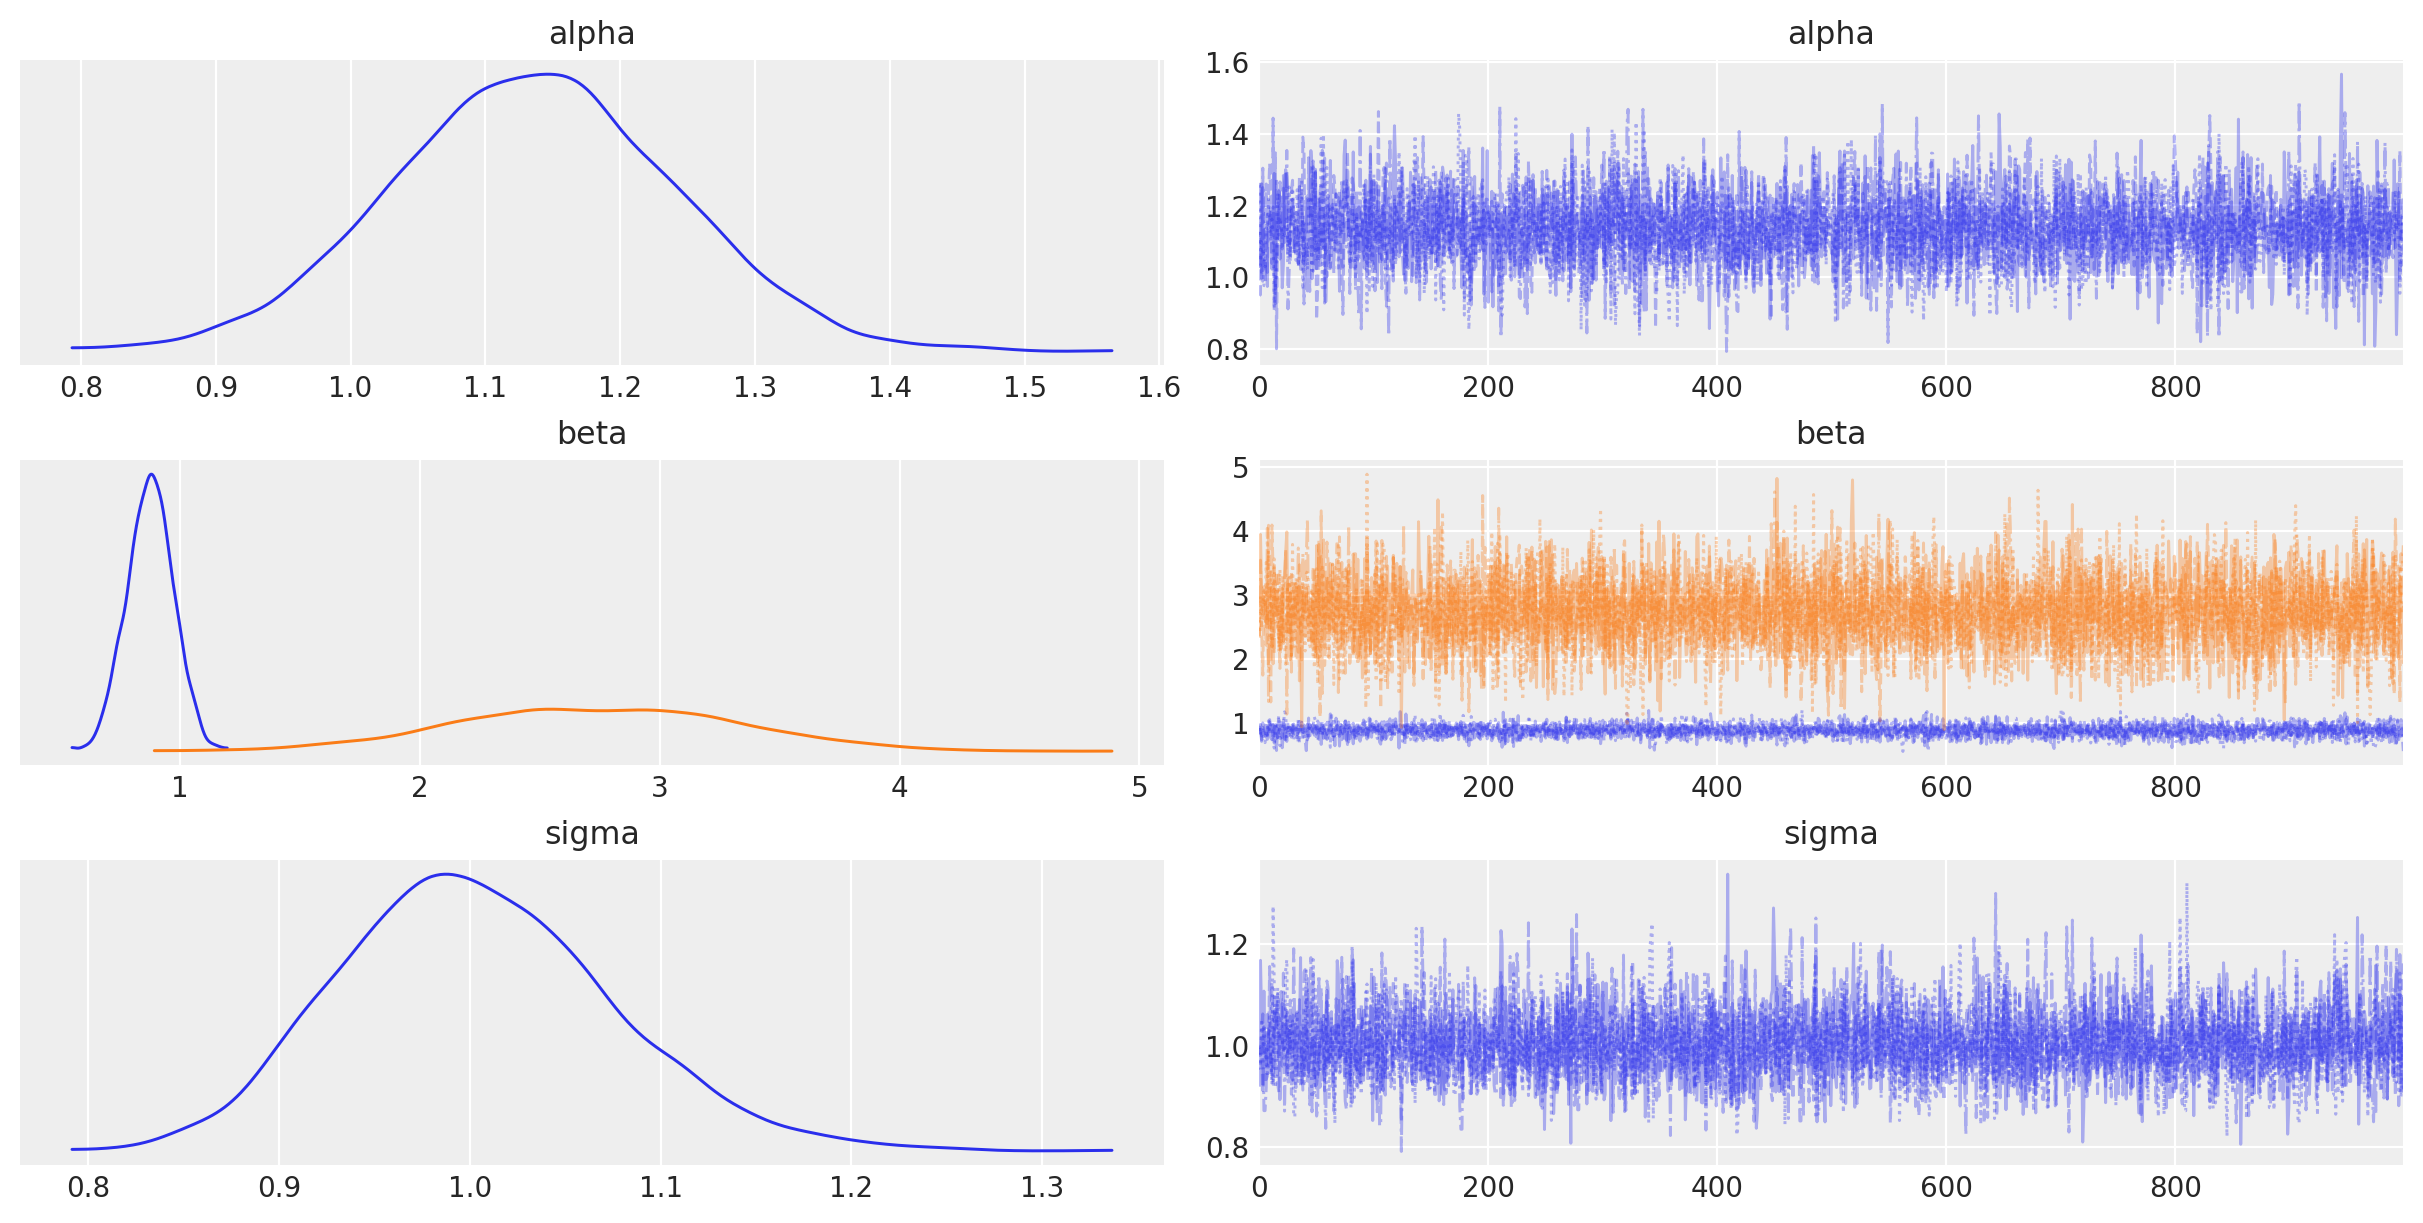

In [14]:
az.plot_trace(idata, combined=True);

In [15]:
az.summary(idata, round_to=2)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.13,0.11,0.95,1.34,0.00,0.00,6180.58,3136.06,1.0
beta[0],0.88,0.10,0.69,1.06,0.00,0.00,5479.87,3124.36,1.0
beta[1],2.74,0.59,1.65,3.85,0.01,0.01,5974.43,3424.32,1.0
sigma,1.00,0.07,0.88,1.14,0.00,0.00,6225.30,2975.88,1.0


## Case study 1: Educational Outcomes for Hearing-impaired Children

As a motivating example, we will use a dataset of educational outcomes for children with hearing impairment. Here, we are interested in determining factors that are associated with better or poorer learning outcomes.

### The Data
This anonymized dataset is taken from the Listening and Spoken Language Data Repository (LSL-DR), an international data repository that tracks the demographics and longitudinal outcomes for children who have hearing loss and are enrolled in programs focused on supporting listening and spoken language development. Researchers are interested in discovering factors related to improvements in educational outcomes within these programs.

There is a suite of available predictors, including:

+ gender (`male`)
+ number of siblings in the household (`siblings`)
+ index of family involvement (`family_inv`)
+ whether the primary household language is not English (`non_english`)
+ presence of a previous disability (`prev_disab`)
+ non-white race (`non_white`)
+ age at the time of testing (in months, `age_test`)
+ whether hearing loss is not severe (`non_severe_hl`)
+ whether the subject’s mother obtained a high school diploma or better (`mother_hs`)
+ whether the hearing impairment was identified by 3 months of age (`early_ident`).

The outcome variable is a standardized test score in one of several learning domains.

In [61]:
test_scores = pd.read_csv(pm.get_data("test_scores.csv"), index_col=0)
test_scores.head()

,score,male,siblings,family_inv,non_english,prev_disab,age_test,non_severe_hl,mother_hs,early_ident,non_white
0,40,0,2.0,2.0,False,NaN,55,1.0,NaN,False,False
1,31,1,0.0,NaN,False,0.0,53,0.0,0.0,False,False
2,83,1,1.0,1.0,True,0.0,52,1.0,NaN,False,True
3,75,0,3.0,NaN,False,0.0,55,0.0,1.0,False,False
5,62,0,0.0,4.0,False,1.0,50,0.0,NaN,False,False


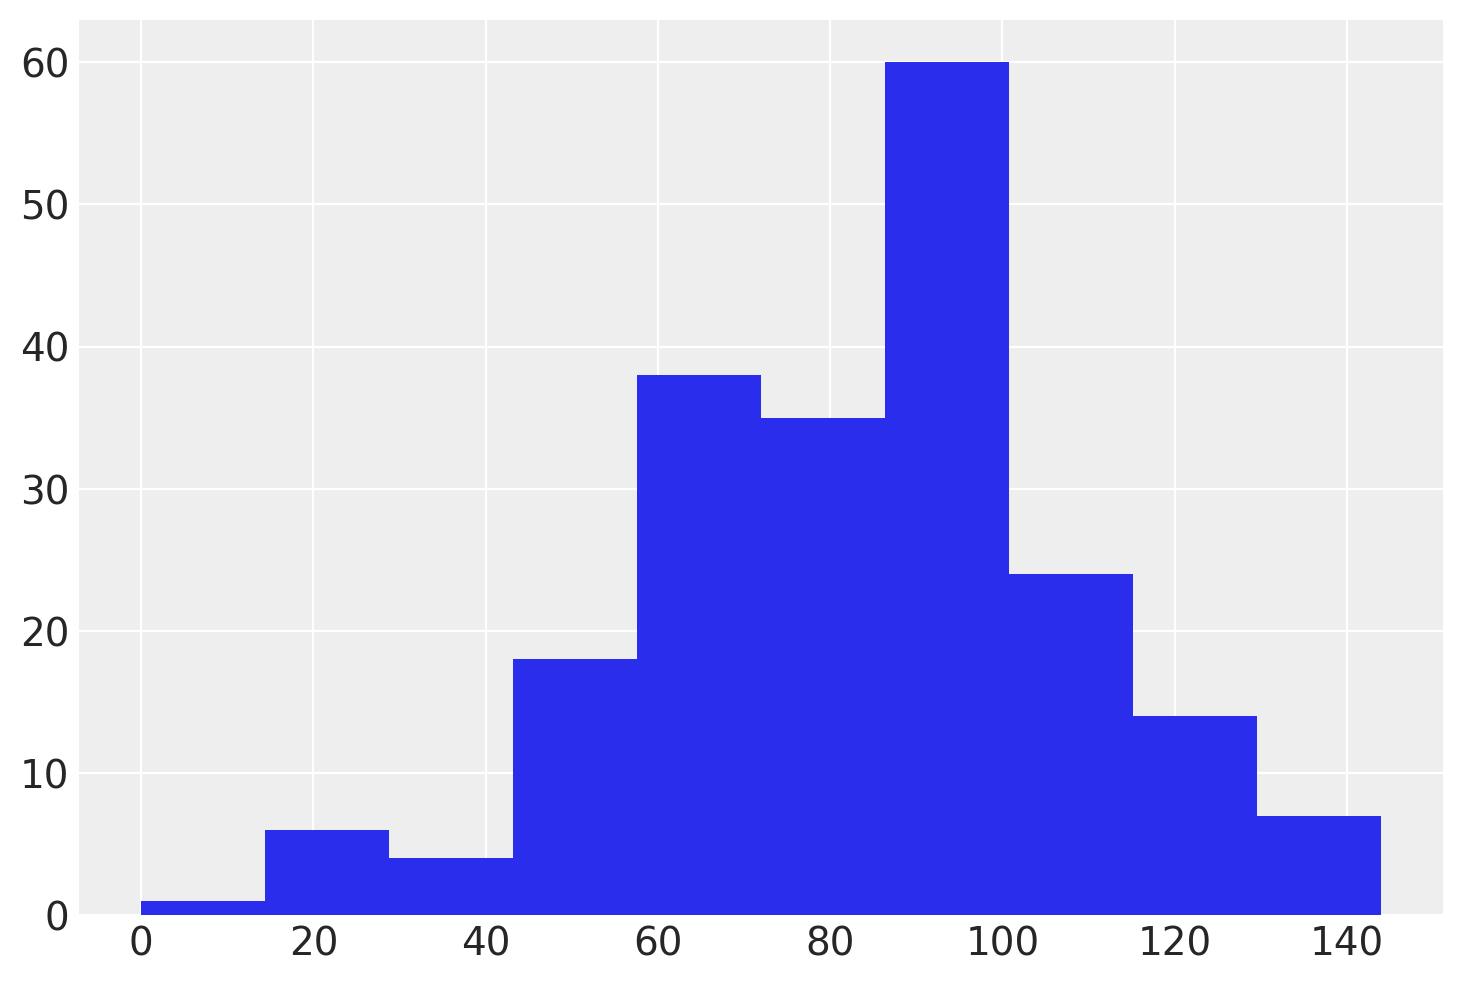

In [62]:
test_scores["score"].hist();

In [63]:
# Dropping missing values is a very bad idea in general, but we do so here for simplicity
X = test_scores.dropna().astype(float)
y = X.pop("score")

# Standardize the features
X -= X.mean()
X /= X.std()

N, D = X.shape

## The Model

In [65]:
D0 = int(D / 2)

import pytensor.tensor as at

with pm.Model(coords={"predictors": X.columns.values}) as test_score_model:
    # Prior on error SD
    sigma = pm.HalfNormal("sigma", 25)

    # Global shrinkage prior
    tau = pm.HalfStudentT("tau", 2, D0 / (D - D0) * sigma / np.sqrt(N))
    # Local shrinkage prior
    lam = pm.HalfStudentT("lam", 2, dims="predictors")
    c2 = pm.InverseGamma("c2", 1, 0.1)
    z = pm.Normal("z", 0.0, 1.0, dims="predictors")
    # Shrunken coefficients
    beta = pm.Deterministic(
        "beta", z * tau * lam * at.sqrt(c2 / (c2 + tau**2 * lam**2)), dims="predictors"
    )
    # No shrinkage on intercept
    beta0 = pm.Normal("beta0", 100, 25.0)

    scores = pm.Normal("scores", beta0 + at.dot(X.values, beta), sigma, observed=y.values)

Notice that we have wrapped the calculation of beta in a Deterministic PyMC class. You can read more about this in detail below, but this ensures that the values of this deterministic variable is retained in the sample trace.

Also note that we have declared the Model name test_score_model in the first occurrence of the context manager, rather than splitting it into two lines, as we did for the first example.

Once the model is complete, we can look at its structure using GraphViz, which plots the model graph. It’s useful to ensure that the relationships in the model you have coded are correct, as it’s easy to make coding mistakes.

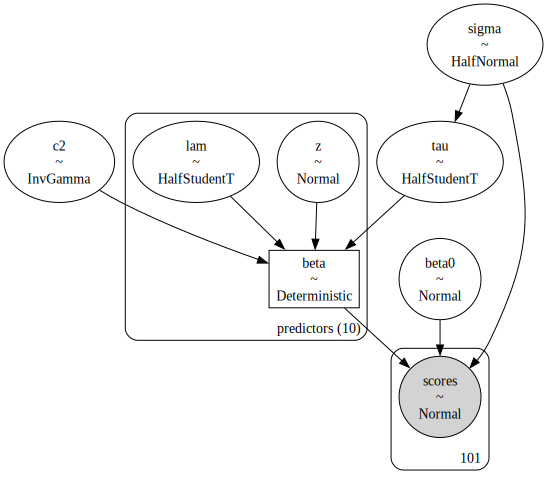

In [67]:
pm.model_to_graphviz(test_score_model)

Before we proceed further, let’s see what the model does before it sees any data. We can conduct **prior predictive sampling** to generate simulated data from the model. Then, let’s compare these simulations to the actual test scores in the dataset.

In [69]:
with test_score_model:
    prior_samples = pm.sample_prior_predictive(100)

Sampling: [beta0, c2, lam, scores, sigma, tau, z]


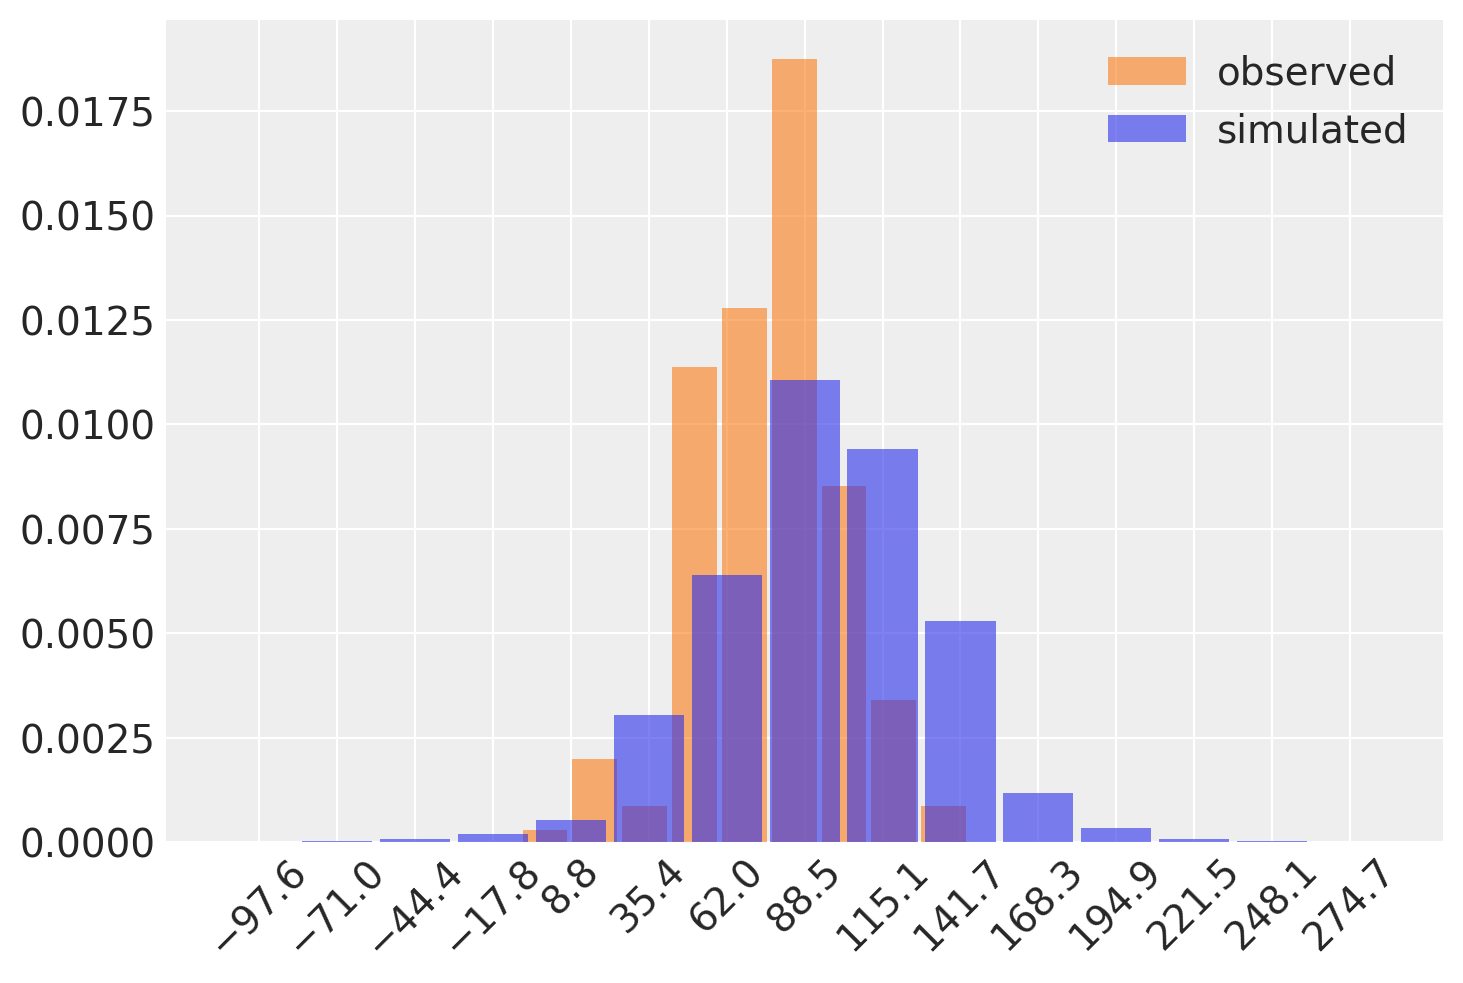

In [70]:
az.plot_dist(
    test_scores["score"].values,
    kind="hist",
    color="C1",
    hist_kwargs=dict(alpha=0.6),
    label="observed",
)
az.plot_dist(
    prior_samples.prior_predictive["scores"],
    kind="hist",
    hist_kwargs=dict(alpha=0.6),
    label="simulated",
)
plt.xticks(rotation=45);

How do we know if this is reasonable or not? This requires some domain knowledge of the problem. Here, we are trying to predict the outcomes of test scores. If our model was predicting values in the thousands, or lots of negative values, while excluding scores that are plausible, then we have misspecified our model. You can see here that the support of the distribution of simulated data completely overlaps the support of the observed distribution of scores; this is a good sign! There are a few negative values and a few that are probably too large to be plausible, but nothing to worry about.

## Model Fitting
Now for the easy part: PyMC’s “Inference Button” is the call to sample. We will let this model tune for a little longer than the default value (1000 iterations). This gives the NUTS sampler a little more time to tune itself adequately.

In [71]:
with test_score_model:
    idata = pm.sample(1000, tune=2000, random_seed=42)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, tau, lam, c2, z, beta0]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 79 seconds.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.


In [72]:
with test_score_model:
    idata = pm.sample(1000, tune=2000, random_seed=42, target_accept=0.99)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, tau, lam, c2, z, beta0]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 157 seconds.


## Model checking

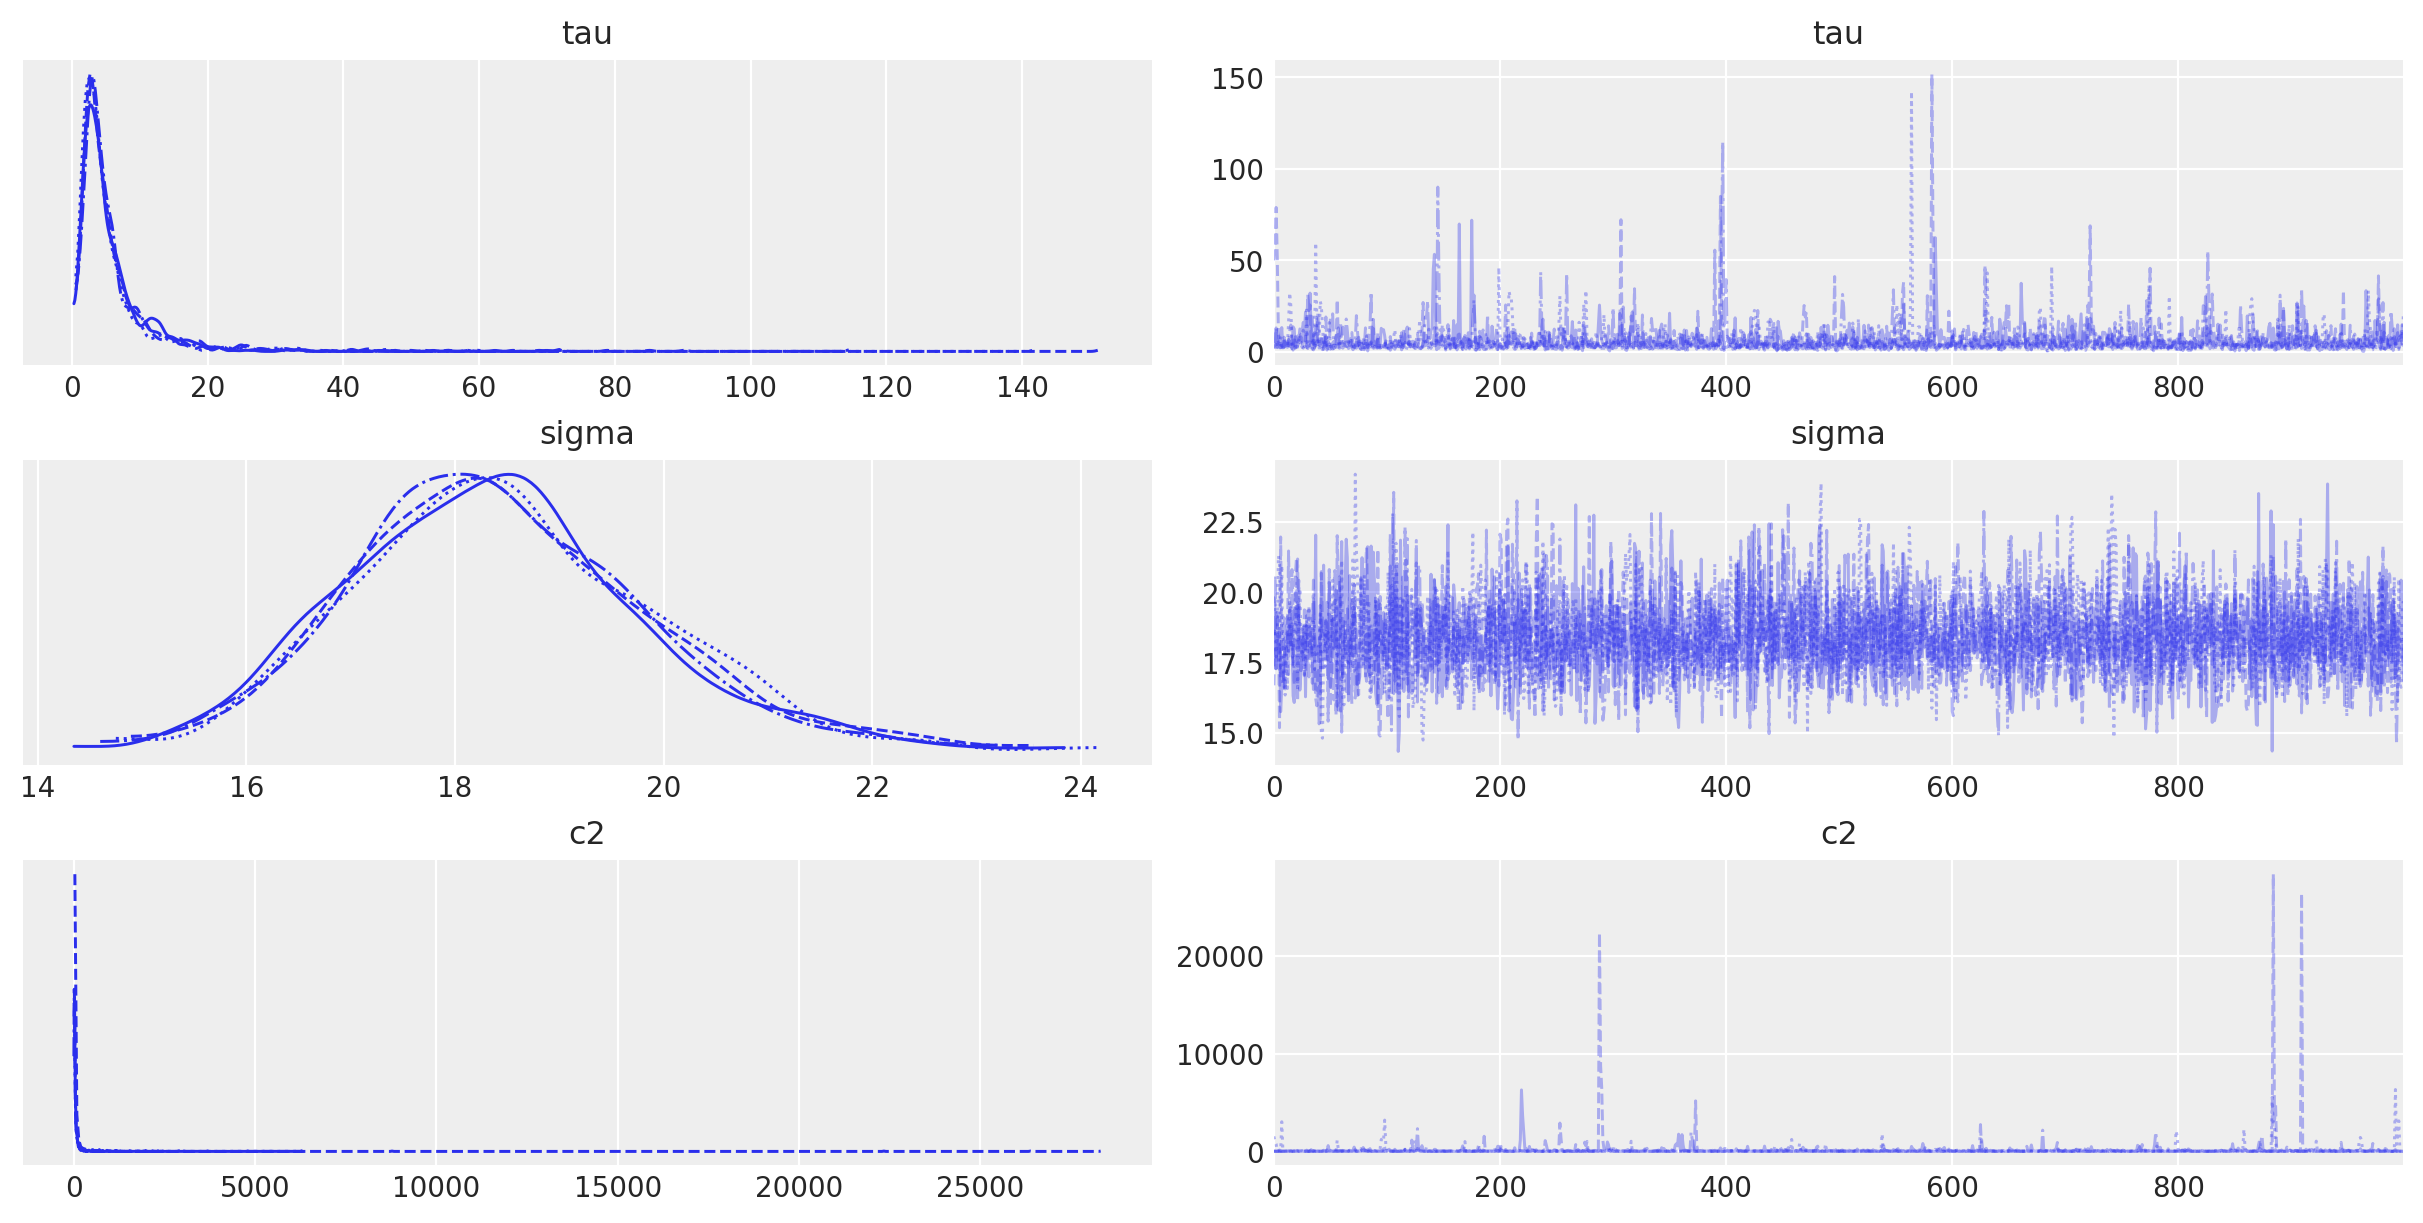

In [73]:
az.plot_trace(idata, var_names=["tau", "sigma", "c2"]);

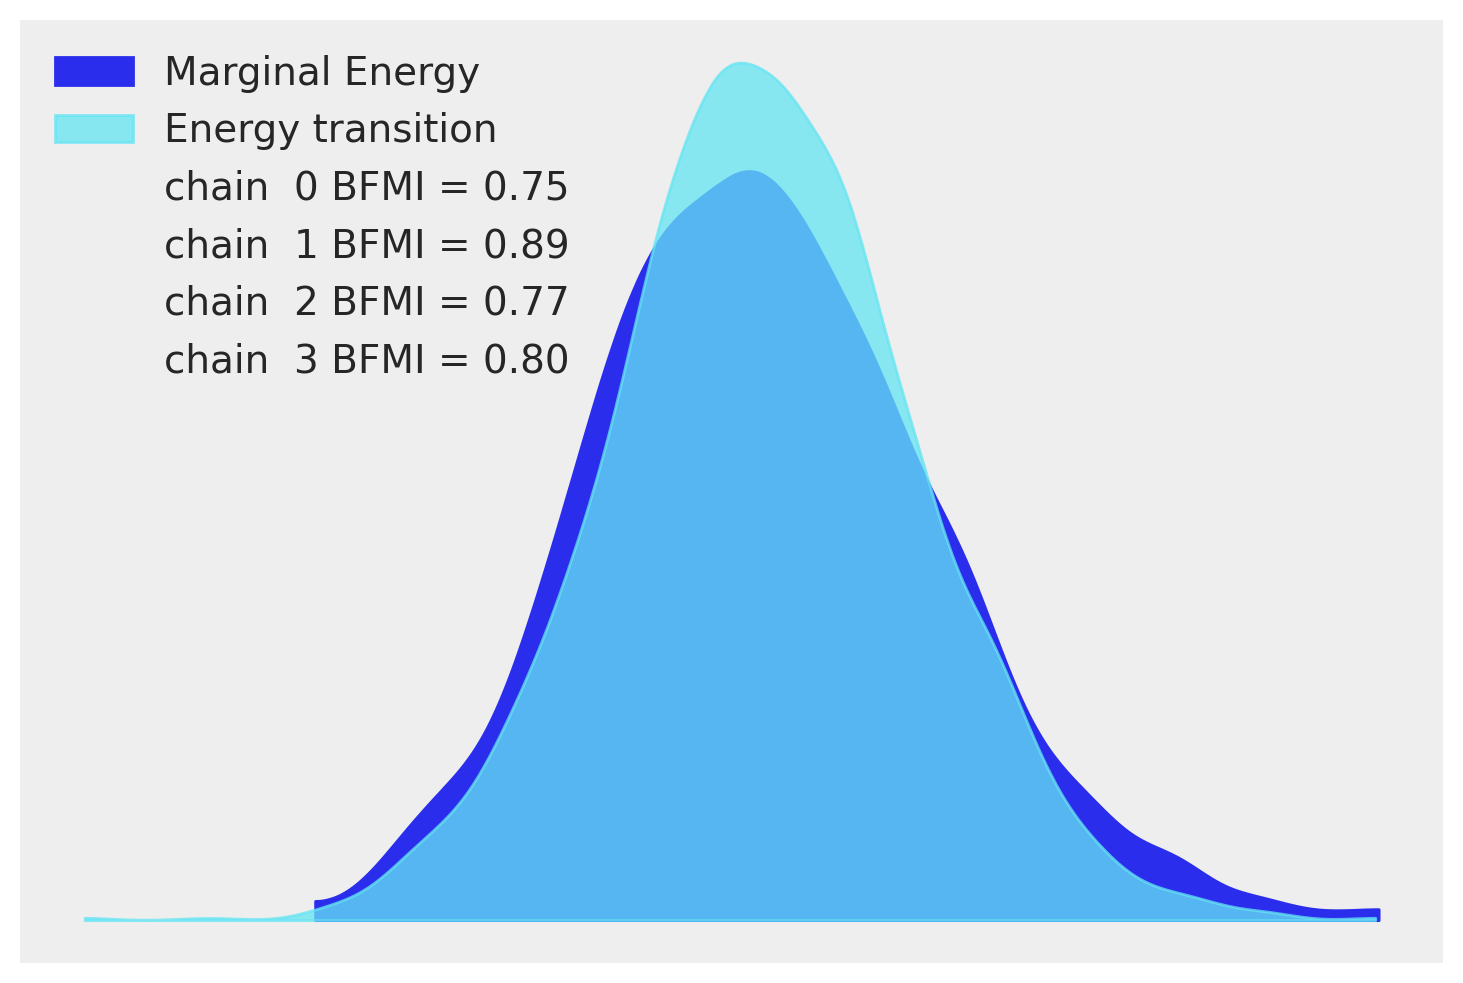

In [74]:
az.plot_energy(idata);

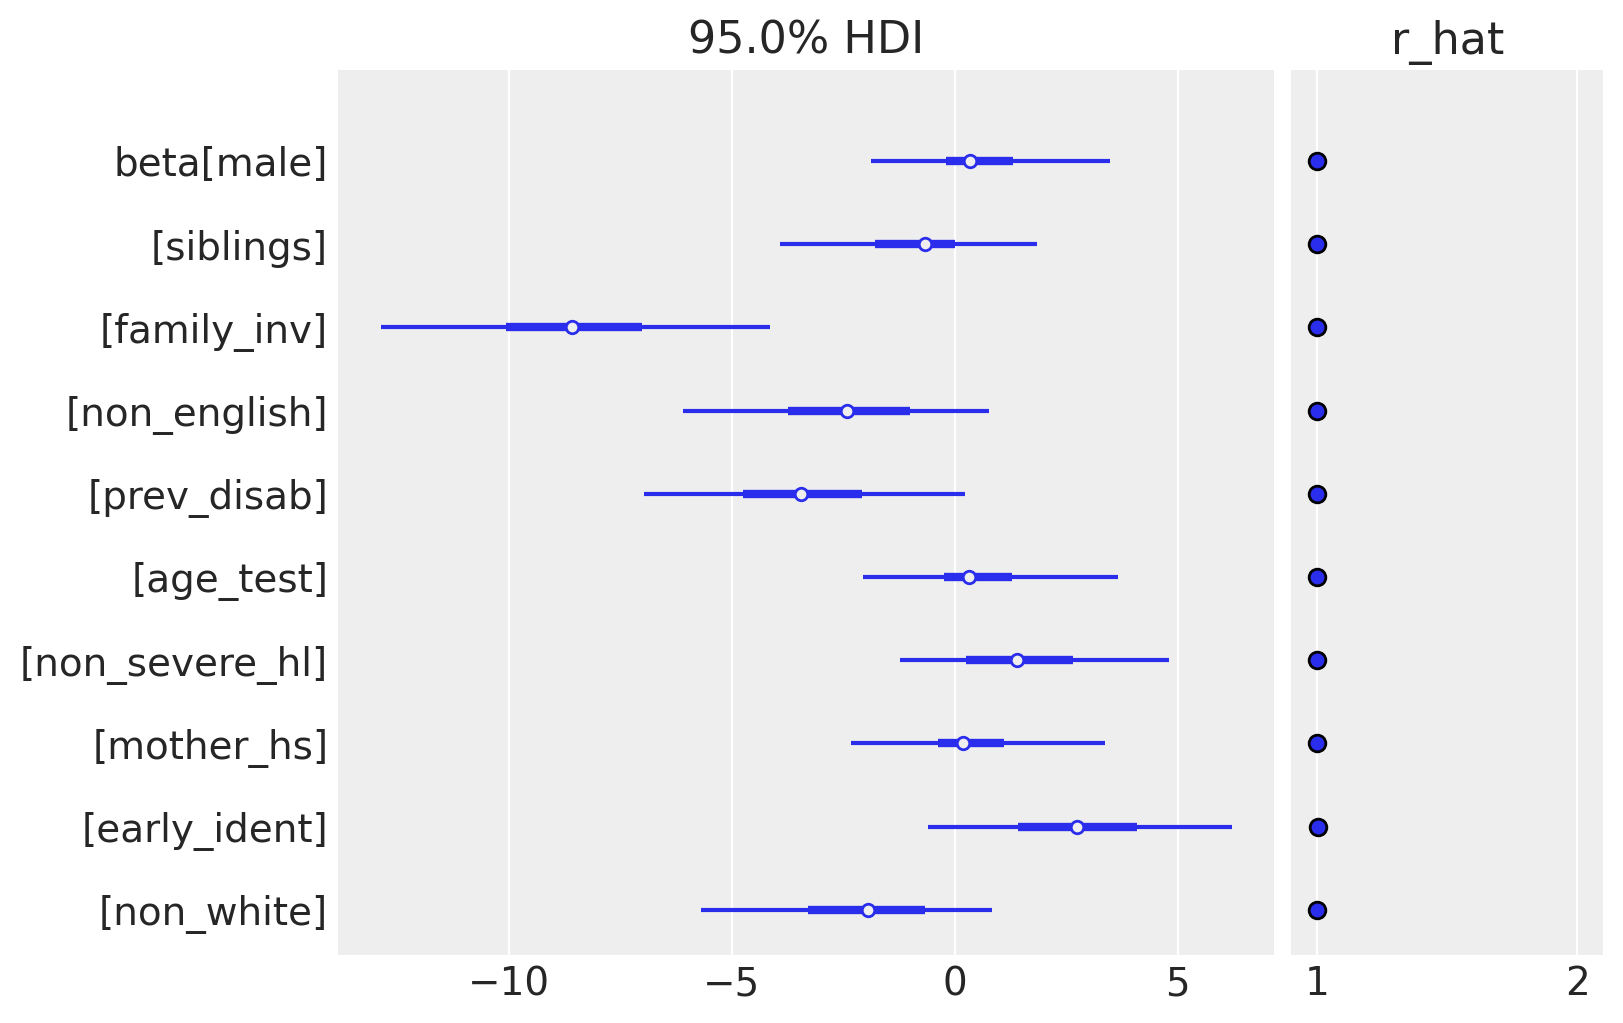

In [75]:
az.plot_forest(idata, var_names=["beta"], combined=True, hdi_prob=0.95, r_hat=True);